# Data Set
    - we have taken the twitter data set here is the link for it 
   
## Why  this database  ?
    - we observed most of the mails to the customer support are short and crisp 
    
    - where customer tend to say there problem ending up in one sentence 
    
    - research also show there will be an external links in the mail
    
    - so people like to use emoji (worst case: accidental) 
     

### whats is inside the database ?
    
    - this data set mainly have the column 'target', 'id', 'date', 'flag', 'user', 'text'
    
    - if we analysis the 'target' column  data we do have 3 categories 0- negative  4 is positive 2 - neutral 
    
    - another column was sentence where we have text
    
    - we don't require the rest of the column 


### Preprocessing 
    - we decided to change the label classification  from  4 to 1 so it can be fit in our model 
    
    - reason for not taking the neutral into consideration it will flip the polarity of our final target 

    - we sort the mails on 2 categories  positive and negative 
    



In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GlobalMaxPool1D, Conv1D, LSTM, SpatialDropout1D
from keras.layers import Dropout, Bidirectional, BatchNormalization

import emoji
import nltk


#### glance of the dataset

In [20]:
data_set = pd.read_csv("training_set_test.csv", names=['target', 'id', 'date', 'flag', 'user', 'text'], encoding = 'latin', header=None)
data_set
# data set before changing 

,target,id,date,flag,user,text
807024,4,1468918425,Tue Apr 07 04:24:07 PDT 2009,NO_QUERY,kt_m,@xxandip uh oh i take it someone cant spell yo...
816990,4,1551618587,Sat Apr 18 09:31:58 PDT 2009,NO_QUERY,TrendyNutrition,how do hospitals cut back on oral supplements ...
806663,4,1468853138,Tue Apr 07 04:04:25 PDT 2009,NO_QUERY,famela,Going on the flyer now!
807528,4,1469010670,Tue Apr 07 04:49:41 PDT 2009,NO_QUERY,eijay,says bye text text nalang ;) http://plurk.com...
8310,0,1470150588,Tue Apr 07 08:29:58 PDT 2009,NO_QUERY,ycandybrooklyn,um. i think i bombed that quiz.
...,...,...,...,...,...,...
27199,0,1559095503,Sun Apr 19 10:14:48 PDT 2009,NO_QUERY,t420,@tcherryx I ran out of greenery &amp; have no...
808807,4,1469294121,Tue Apr 07 05:55:02 PDT 2009,NO_QUERY,richmondlincoln,"@JanSimpson Thankfully, Ford Motor Company isn..."
829430,4,1557164453,Sun Apr 19 02:23:29 PDT 2009,NO_QUERY,nikkideevah,my feet hurt dayum four inches... in bed though
20814,0,1557153290,Sun Apr 19 02:19:19 PDT 2009,NO_QUERY,awesome_dan,noone will see these updates! i have no follow...


### Replacing the label classification from 4 to 1 

In [21]:
# changing the classification label form 4 --> 1
data_set['target'].replace({4: 1}, inplace=True)
data_set

,target,id,date,flag,user,text
807024,1,1468918425,Tue Apr 07 04:24:07 PDT 2009,NO_QUERY,kt_m,@xxandip uh oh i take it someone cant spell yo...
816990,1,1551618587,Sat Apr 18 09:31:58 PDT 2009,NO_QUERY,TrendyNutrition,how do hospitals cut back on oral supplements ...
806663,1,1468853138,Tue Apr 07 04:04:25 PDT 2009,NO_QUERY,famela,Going on the flyer now!
807528,1,1469010670,Tue Apr 07 04:49:41 PDT 2009,NO_QUERY,eijay,says bye text text nalang ;) http://plurk.com...
8310,0,1470150588,Tue Apr 07 08:29:58 PDT 2009,NO_QUERY,ycandybrooklyn,um. i think i bombed that quiz.
...,...,...,...,...,...,...
27199,0,1559095503,Sun Apr 19 10:14:48 PDT 2009,NO_QUERY,t420,@tcherryx I ran out of greenery &amp; have no...
808807,1,1469294121,Tue Apr 07 05:55:02 PDT 2009,NO_QUERY,richmondlincoln,"@JanSimpson Thankfully, Ford Motor Company isn..."
829430,1,1557164453,Sun Apr 19 02:23:29 PDT 2009,NO_QUERY,nikkideevah,my feet hurt dayum four inches... in bed though
20814,0,1557153290,Sun Apr 19 02:19:19 PDT 2009,NO_QUERY,awesome_dan,noone will see these updates! i have no follow...


Writing a  function block that helps us to clean the  data from the following 

    - removing the @ sign 
    
    - removing HTTP links 

    - removing  emojis 

    - remove hashtags 

In [22]:
def clean_data(data_set):

   # Remove @ sign
   data_set = re.sub("@[A-Za-z0-9]+", "", data_set)  
   
   # Remove http links
   data_set = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", data_set)  
   data_set = " ".join(data_set.split())
   
   # Remove Emojis
   data_set = ''.join(c for c in data_set if c not in emoji.UNICODE_EMOJI)  
   
   # Remove hashtag sign and keep the text
   data_set = data_set.replace("#", "").replace("_", " ")  
   data_set = " ".join(w for w in nltk.wordpunct_tokenize(data_set))
   return data_set

# glance of data after cleaning data 

In [23]:
# data set before cleaning 
data_set.head()

,target,id,date,flag,user,text
807024,1,1468918425,Tue Apr 07 04:24:07 PDT 2009,NO_QUERY,kt_m,@xxandip uh oh i take it someone cant spell yo...
816990,1,1551618587,Sat Apr 18 09:31:58 PDT 2009,NO_QUERY,TrendyNutrition,how do hospitals cut back on oral supplements ...
806663,1,1468853138,Tue Apr 07 04:04:25 PDT 2009,NO_QUERY,famela,Going on the flyer now!
807528,1,1469010670,Tue Apr 07 04:49:41 PDT 2009,NO_QUERY,eijay,says bye text text nalang ;) http://plurk.com...
8310,0,1470150588,Tue Apr 07 08:29:58 PDT 2009,NO_QUERY,ycandybrooklyn,um. i think i bombed that quiz.


In [24]:
data_set['text'] = data_set['text'].map(lambda x: clean_data(x))
text = data_set['text']
label = data_set['target']

In [25]:
text.head()

807024    uh oh i take it someone cant spell your name ?...
816990    how do hospitals cut back on oral supplements ...
806663                             Going on the flyer now !
807528                         says bye text text nalang ;)
8310                      um . i think i bombed that quiz .
Name: text, dtype: object

In [26]:
label.head()

807024    1
816990    1
806663    1
807528    1
8310      0
Name: target, dtype: int64

## Split the test and training data using the sklearn train_test_split

In [27]:
train_data , test_data , target_train, target_test = train_test_split(text, label,random_state=1000,) 


The next step is to follow tokenization 

# Tokenization 

*fit_on_texts* : Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).

*texts_to_sequences* : Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

In [65]:
# max tokens in one sentence
train_data.to_pickle('test_data.pkl')
maxlen = 60  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
vocab_size = len(tokenizer.word_index) + 1


# transform sentence  to vector
X_train = tokenizer.texts_to_sequences(train_data)
X_test = tokenizer.texts_to_sequences(test_data)

# padding sequence
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [29]:
X_train

array([[6829, 3110,  135, ...,    0,    0,    0],
       [ 686,   37,    7, ...,    0,    0,    0],
       [ 384,    8, 8719, ...,    0,    0,    0],
       ...,
       [  23, 1135,    4, ...,    0,    0,    0],
       [ 445,  698,    1, ...,    0,    0,    0],
       [ 575,  330,   13, ...,    0,    0,    0]], dtype=int32)

In [30]:
X_test

array([[  55,    9,   62, ...,    0,    0,    0],
       [   1,   33,   70, ...,    0,    0,    0],
       [ 663,    1,   74, ...,    0,    0,    0],
       ...,
       [ 143,  294,   85, ...,    0,    0,    0],
       [1186, 3024, 2446, ...,    0,    0,    0],
       [  90,  146,    1, ...,    0,    0,    0]], dtype=int32)

By using an embedding layer as the first layer of our network we need to specify what is the embedding dimension (ie. the dimension of the vector associated to the integer of the sequence)

In [31]:
embedding_dim = 100

# Plotting the results 
 - This function block helps in plotting graph

In [32]:
def plot_history(history):
   acc = history.history['accuracy']
   val_acc = history.history['val_accuracy']
   loss = history.history['loss']
   val_loss = history.history['val_loss']
   x = range(1, len(acc) + 1)

   plt.figure(figsize=(12, 5))
   plt.subplot(1, 2, 1)
   plt.plot(x, acc, 'b', label='Training acc')
   plt.plot(x, val_acc, 'r', label='Validation acc')
   plt.title('Training and validation accuracy')
   plt.legend()
   plt.subplot(1, 2, 2)
   plt.plot(x, loss, 'b', label='Training loss')
   plt.plot(x, val_loss, 'r', label='Validation loss')
   plt.title('Training and validation loss')
   plt.legend()

# Creating machine learning pipeline

In [33]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, target_train, epochs=10,verbose=1, validation_data=(X_test, target_test), batch_size=150)

Epoch 1/10
125/250 [==============>...............] - ETA: 4s - loss: 0.6511 - accuracy: 0.6806

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 100)           2928900   
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 2,929,921
Trainable params: 2,929,921
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.99787
Testing Accuracy:  0.73120


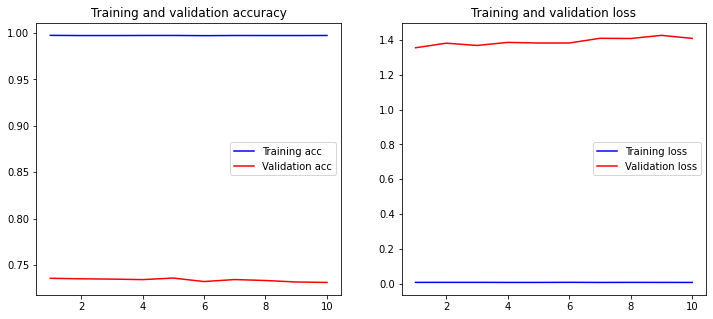

In [ ]:
loss, accuracy = model.evaluate(X_train, target_train, verbose=False)
print("Training Accuracy: {:.5f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, target_test, verbose=False)
print("Testing Accuracy:  {:.5f}".format(accuracy))
plot_history(history)

# model 2 using word embedding 

"Word embeddings" are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.

For instance, "coconut" and "polar bear" are words that are semantically quite different, so a reasonable embedding space would represent them as vectors that would be very far apart. But "kitchen" and "dinner" are related words, so they should be embedded close to each other.

## creating a function that will help in embedding matrix 

In [35]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
   vocab_size = len(word_index) + 1 
   embedding_matrix = np.zeros((vocab_size, embedding_dim))

   with open(filepath) as f:
      for line in f:
         word, *vector = line.split()
         if word in word_index:
            idx = word_index[word] 
            embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
   
   return embedding_matrix

In [36]:
embedding_dim_glove = 50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt', tokenizer.word_index, embedding_dim_glove)

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim_glove, weights=[embedding_matrix], input_length=maxlen, trainable=True))
model2.add(Conv1D(128, 5, activation='relu'))
model2.add(GlobalMaxPool1D())
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 60, 50)            1464450   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 56, 128)           32128     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 1,497,879
Trainable params: 1,497,879
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, target_train, epochs=10, verbose=1, validation_data=(X_test, target_test), batch_size=150)

Epoch 1/10
250/250 [==============================] - 4s 17ms/step - loss: 0.5704 - accuracy: 0.6981 - val_loss: 0.5166 - val_accuracy: 0.7431
Epoch 2/10
250/250 [==============================] - 4s 16ms/step - loss: 0.4576 - accuracy: 0.7834 - val_loss: 0.4829 - val_accuracy: 0.7716
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3854 - accuracy: 0.8278 - val_loss: 0.4838 - val_accuracy: 0.7742
Epoch 4/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3163 - accuracy: 0.8667 - val_loss: 0.5053 - val_accuracy: 0.7750
Epoch 5/10
250/250 [==============================] - 4s 16ms/step - loss: 0.2418 - accuracy: 0.9062 - val_loss: 0.5510 - val_accuracy: 0.7718
Epoch 6/10
250/250 [==============================] - 4s 16ms/step - loss: 0.1738 - accuracy: 0.9368 - val_loss: 0.6174 - val_accuracy: 0.7657
Epoch 7/10
250/250 [==============================] - 4s 16ms/step - loss: 0.1167 - accuracy: 0.9613 - val_loss: 0.7244 - val_accuracy: 0.7554

In [ ]:
loss2, accuracy2 = model2.evaluate(X_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy2))
loss2, accuracy2 = model2.evaluate(X_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy2))

Training Accuracy: 0.9977
Testing Accuracy:  0.7386


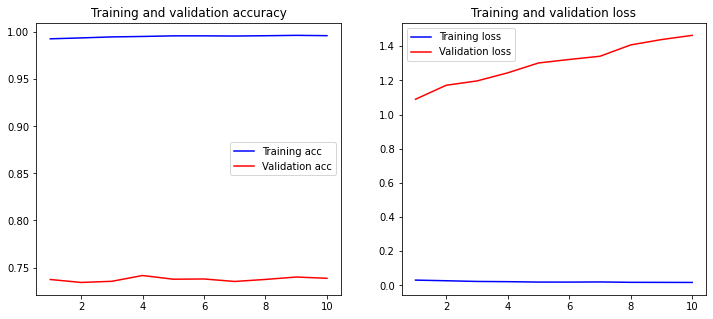

In [ ]:
plot_history(history2)

# Model 3 using sequential model using the lstm 

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

In [37]:
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim_glove, weights=[embedding_matrix], input_length=maxlen, trainable=True))
model3.add(SpatialDropout1D(0.1))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(Bidirectional(LSTM(4, return_sequences=True)))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(GlobalMaxPool1D())
model3.add(Dropout(0.25))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 50)            1464450   
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 50)           0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 56, 128)           32128     
                                                                 
 bidirectional (Bidirectiona  (None, 56, 8)            4256      
 l)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 52, 128)           5248      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)             

In [38]:
history3 = model3.fit(X_train, target_train, epochs=15, verbose=1, validation_data=(X_test, target_test), batch_size=150)

Epoch 1/15
250/250 [==============================] - 23s 80ms/step - loss: 0.6003 - accuracy: 0.6773 - val_loss: 0.5265 - val_accuracy: 0.7414
Epoch 2/15
250/250 [==============================] - 17s 68ms/step - loss: 0.4990 - accuracy: 0.7597 - val_loss: 0.4848 - val_accuracy: 0.7718
Epoch 3/15
250/250 [==============================] - 17s 69ms/step - loss: 0.4425 - accuracy: 0.7958 - val_loss: 0.4970 - val_accuracy: 0.7614
Epoch 4/15
250/250 [==============================] - 17s 68ms/step - loss: 0.3958 - accuracy: 0.8223 - val_loss: 0.4839 - val_accuracy: 0.7802
Epoch 5/15
250/250 [==============================] - 17s 68ms/step - loss: 0.3494 - accuracy: 0.8490 - val_loss: 0.4964 - val_accuracy: 0.7788
Epoch 6/15
250/250 [==============================] - 17s 68ms/step - loss: 0.3049 - accuracy: 0.8713 - val_loss: 0.5425 - val_accuracy: 0.7791
Epoch 7/15
250/250 [==============================] - 17s 68ms/step - loss: 0.2694 - accuracy: 0.8897 - val_loss: 0.5403 - val_accuracy:

Training Accuracy: 0.9796
Testing Accuracy:  0.7620


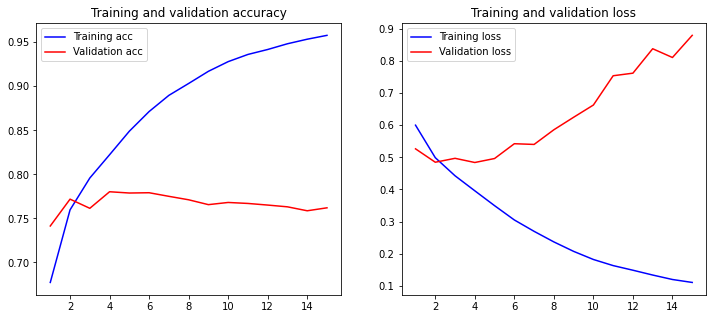

In [39]:
loss3, accuracy3 = model3.evaluate(X_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy3))
loss3, accuracy3 = model3.evaluate(X_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy3))
plot_history(history3)

In [40]:
def transform_sentences_to_sequences(sentences, tokenizer, maxlen):
   texts = tokenizer.texts_to_sequences(sentences)
   texts = pad_sequences(texts, padding='post', maxlen=maxlen)
   return texts

In [41]:
def to_cat(prediction):
   prediction[prediction > 0.5] = 1

def predict_all_model(texts, list_model, tokenizer):
   list_pred = []
   for model in list_model:
      texts_to_pred = transform_sentences_to_sequences(texts, tokenizer, maxlen=maxlen)
      pred = model.predict(texts_to_pred)
      pred = to_cat(pred)
      list_pred.append(pred)
   return list_pred

In [42]:
is_negative_test = data_set['target'] == 0
is_positive_test = data_set['target'] == 1

negatives = data_set[is_negative_test]
positives = data_set[is_positive_test]


test_positives = positives[5001:30000]
test_negatives = negatives[5001:30000]

# create a shuffled sample containing the same proportion of positive and negative than in the original file
test_example = pd.concat([test_positives, test_negatives])
test_example = test_example.sample(frac=1)

In [43]:
test_example['target'].replace({4: 1}, inplace=True)
test_example['text'] = test_example['text'].map(lambda x: clean_data(x))
text_to_pred = test_example['text']
target_values = test_example['target']

In [44]:

def predict_all_model(texts, list_model, tokenizer):
   list_pred = []
   for model in list_model:
      texts_to_pred = transform_sentences_to_sequences(texts, tokenizer, maxlen=maxlen)
      pred = model.predict(texts_to_pred)
      pred = pred.reshape(-1)
   
      pred[pred > 0.5] = 1
      pred[pred <= 0.5] = 0
      list_pred.append(pred)
   return list_pred


def get_confusion_matrix(list_prediction, actual_value):
   list_confusion_matrix = []
   for index, prediction in enumerate(list_prediction, start=1):
      column_name = 'Predicted_model{}'.format(index)
      data = {'y_Actual': actual_value.to_numpy(), 'y_Predicted_model': prediction}
      print(data)
      df = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted_model'])
      confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted_model'], rownames=['Actual'], colnames=[column_name])
      list_confusion_matrix.append(confusion_matrix)
   return list_confusion_matrix

In [45]:
predictions = predict_all_model(text_to_pred, [model, model2, model3], tokenizer)
list_confusion_matrix = get_confusion_matrix(predictions, target_values)

NameError: name 'model2' is not defined

In [ ]:
for confusion_matrix in list_confusion_matrix:
    print(confusion_matrix, end='\n\n\n')

Predicted_model1    0.0    1.0
Actual                        
0                 18610   1388
1                  1248  18750


Predicted_model2    0.0    1.0
Actual                        
0                 18478   1520
1                  1173  18825


Predicted_model3    0.0    1.0
Actual                        
0                 18471   1527
1                  1345  18653




3 model predictions values are gud compare to other value 

In [ ]:

pred = model.predict([transform_sentences_to_sequences("hey how are you", tokenizer, maxlen=maxlen)])

In [ ]:
text_to_pred.head()

812727                               He played ball with me
16669                       My ankle hurts time for sleep .
20756                                    A i lost my wallet
822608                                                     
810258    Please show the way around here . He needs to ...
Name: text, dtype: object

In [ ]:
pred

array([[0.9954134 ],
       [0.04356766],
       [0.42026722],
       [0.5648705 ],
       [0.9954134 ],
       [0.8426626 ],
       [0.23132324],
       [0.5648705 ],
       [0.00269383],
       [0.99031496],
       [0.04356766],
       [0.5648705 ],
       [0.42026734],
       [0.8426624 ],
       [0.47687697]], dtype=float32)

In [ ]:
pred[pred > 0.5] = 1

In [ ]:
pred[pred <= 0.5] = 0


In [ ]:
pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [46]:
def transform_sentence_to_sequence(sentence, tokenizer, maxlen):
   texts = tokenizer.texts_to_sequences([sentence])
   texts = pad_sequences(texts, padding='post', maxlen=maxlen)
   return texts

In [49]:
pred = model3.predict([transform_sentence_to_sequence("i am sad  with you services", tokenizer, maxlen=maxlen)])

In [50]:
pred

array([[0.00120613]], dtype=float32)

In [51]:
model3.save('lstm.h5')

In [52]:
import keras

test_model =keras.models.load_model('lstm.h5')

In [53]:
pred = test_model.predict([transform_sentence_to_sequence("i am sad  with you services", tokenizer, maxlen=maxlen)])

In [58]:
print(pred)

[[0.00120613]]


In [60]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


model3 = keras.models.load_model('lstm.h5')


def transform_sentence_to_sequence(sentence, tokenizer, maxlen):
   texts = tokenizer.texts_to_sequences([sentence])
   texts = pad_sequences(texts, padding='post', maxlen=maxlen)
   print(texts)
   return texts


maxlen = 60  
tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data)
pred = model3.predict([transform_sentence_to_sequence("i am sad  with you services", tokenizer, maxlen=maxlen)])

print(type(pred))
print(pred.view())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
<class 'numpy.ndarray'>
[[0.53108114]]
